In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar los Datos

In [2]:
# Cargar los datos
df = pd.read_csv('data.csv')
df.shape

(8760, 14)

## Limpieza de datos

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Revisar si hay datos faltantes
print(df.isnull().sum())

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


**Analisis:** Se evidencia que los datos de entrada no tiene ningun dato faltante. Por lo anterior se continua revisando si existen datos repetidos en el dataset.

In [5]:
# Eliminar datos repetidos
df.drop_duplicates(inplace=True)
df.shape


(8760, 14)

**Analisis:** Se evidencia que los datos de entreda no presentaban valores duplicados, ya que luego de emplear la funcion de elimar duplicados no se eliminino ningun dato (la cantidad de filas no cambio).

In [6]:

# Eliminar registros donde 'Functioning Day' no sea 'Yes'
df = df[df['Functioning Day'] == 'Yes']

# Eliminar la columna 'Functioning Day'
df.drop(columns=['Functioning Day'], inplace=True)

# Mostrar los primeros registros del DataFrame para confirmar
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


**Analisis:**  Se decidió eliminar los daots de Functioning Day igual a No, ya que no aportan información relevante para el modelo. En el sentido, que si el sistema no estaba funcionando no se rentaron ninguna bicicleta y puede contaminar la influencia en la frecuencia de renta de bicicletas de otros factores. 

In [7]:
# Revisar los tipos de datos de cada columna
print(df.dtypes)


Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
dtype: object


**Analisis:** Se evidencia que los tipos de datos estan correctos, por lo que no se requiere realizar ninguna transformacion de cambiar los tipos de datos.

In [8]:
# Realizo una copia del DataFrame original
df_encoded = df.copy()

# Codificar las columnas categóricas en la copia
df_encoded['Seasons'] = df_encoded['Seasons'].astype('category').cat.codes
df_encoded['Holiday'] = df_encoded['Holiday'].astype('category').cat.codes

# Muestro los primeros registros de ambos DataFrames para confirmar
print("\nDataFrame Codificado:")
df_encoded.describe()



DataFrame Codificado:


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,1.542351,0.951802
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,1.102876,0.214198
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,1.000000,1.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,3.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,3.000000,1.000000


In [9]:
print("\nDataFrame No Codificado:")
df_encoded.describe()


DataFrame No Codificado:


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,1.542351,0.951802
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,1.102876,0.214198
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,1.000000,1.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,3.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,3.000000,1.000000


In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [11]:
df.to_csv('data_limpieza.csv',index=False)

## Ingenieria de datos

Diagramas de Caja

C:\Users\Carol\AppData\Local\Temp\ipykernel_6724\1238756938.py:10: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=numeric_columns, palette=rosados_pastel)


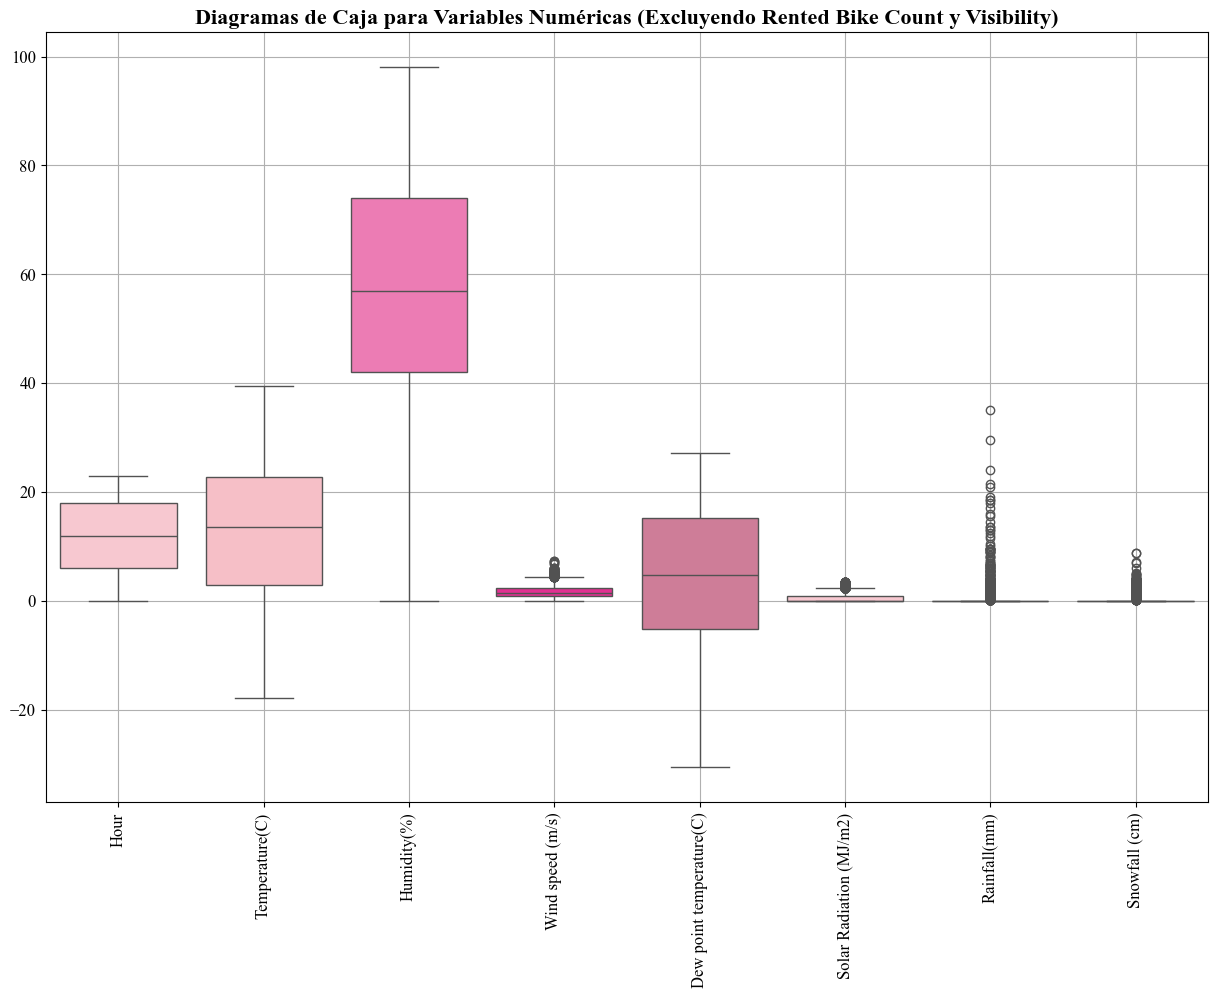

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Rented Bike Count', 'Visibility (10m)'])

rosados_pastel = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093']


plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_columns, palette=rosados_pastel)
plt.xticks(rotation=90, fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.title('Diagramas de Caja para Variables Numéricas (Excluyendo Rented Bike Count y Visibility)', fontsize=16, fontweight='bold', family='Times New Roman')
plt.grid(True)
plt.show()


Diagramas de Violín

Estadísticas del Diagrama de Violín para 'Rented Bike Count' por 'Seasons':
          count         mean         std  min     25%    50%     75%     max
Seasons                                                                     
Autumn   1937.0   924.110480  617.547879  2.0  427.00  856.0  1271.0  3298.0
Spring   2160.0   746.254167  618.667962  2.0  225.00  599.0  1118.0  3251.0
Summer   2208.0  1034.073370  690.244759  9.0  526.75  905.5  1442.5  3556.0
Winter   2160.0   225.541204  150.372236  3.0  110.00  203.0   305.0   937.0


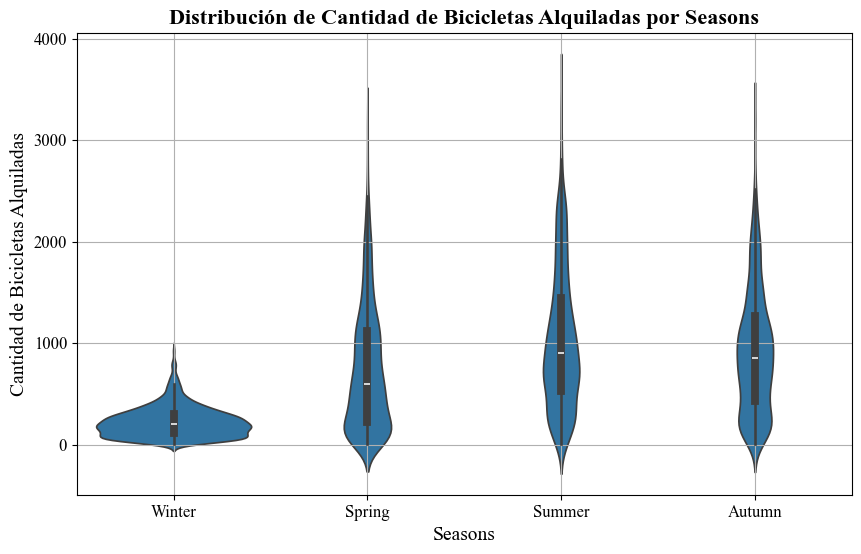

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def violinplot_statistics(df, column, category):
    stats = df.groupby(category)[column].describe(percentiles=[.25, .5, .75])
    
    print(f"Estadísticas del Diagrama de Violín para '{column}' por '{category}':")
    print(stats)
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=category, y=column, data=df)
    plt.title(f'Distribución de Cantidad de Bicicletas Alquiladas por {category}', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.xlabel(category, fontsize=14, family='Times New Roman')
    plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
    plt.xticks(fontsize=12, family='Times New Roman')
    plt.yticks(fontsize=12, family='Times New Roman')
    plt.grid(True)
    plt.show()

violinplot_statistics(df, 'Rented Bike Count', 'Seasons')


Correlación de las variables climáticas con la cantidad de bicicletas alquiladas:
                          Rented Bike Count
Hour                               0.410257
Temperature(C)                     0.538558
Humidity(%)                       -0.199780
Wind speed (m/s)                   0.121108
Visibility (10m)                   0.199280
Dew point temperature(C)           0.379788
Solar Radiation (MJ/m2)            0.261837
Rainfall(mm)                      -0.123074
Snowfall (cm)                     -0.141804


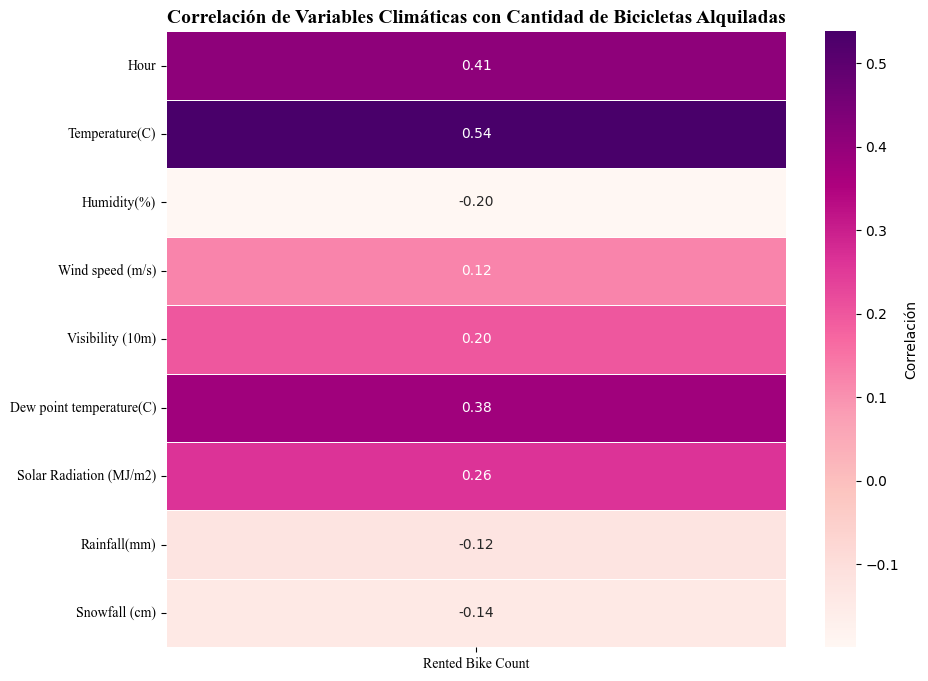

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('data.csv')

# Definir las variables climáticas
variables_climaticas = [
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)', 
    'Dew point temperature(C)', 
    'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 
    'Snowfall (cm)'
]

# Calcular la correlación entre todas las variables
correlacion = df[variables_climaticas + ['Rented Bike Count']].corr()

# Filtrar para mostrar solo la correlación con la variable 'Rented Bike Count'
correlacion_interes = correlacion[['Rented Bike Count']].drop('Rented Bike Count')

# Imprimir la correlación
print("Correlación de las variables climáticas con la cantidad de bicicletas alquiladas:")
print(correlacion_interes)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_interes, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5, 
            cbar_kws={'label': 'Correlación'})
plt.title('Correlación de Variables Climáticas con Cantidad de Bicicletas Alquiladas', 
          fontsize=14, fontweight='bold', family='Times New Roman')
plt.xticks(fontsize=10, family='Times New Roman')
plt.yticks(fontsize=10, family='Times New Roman')
plt.show()

Gráfico de Series Temporales de Ingresos

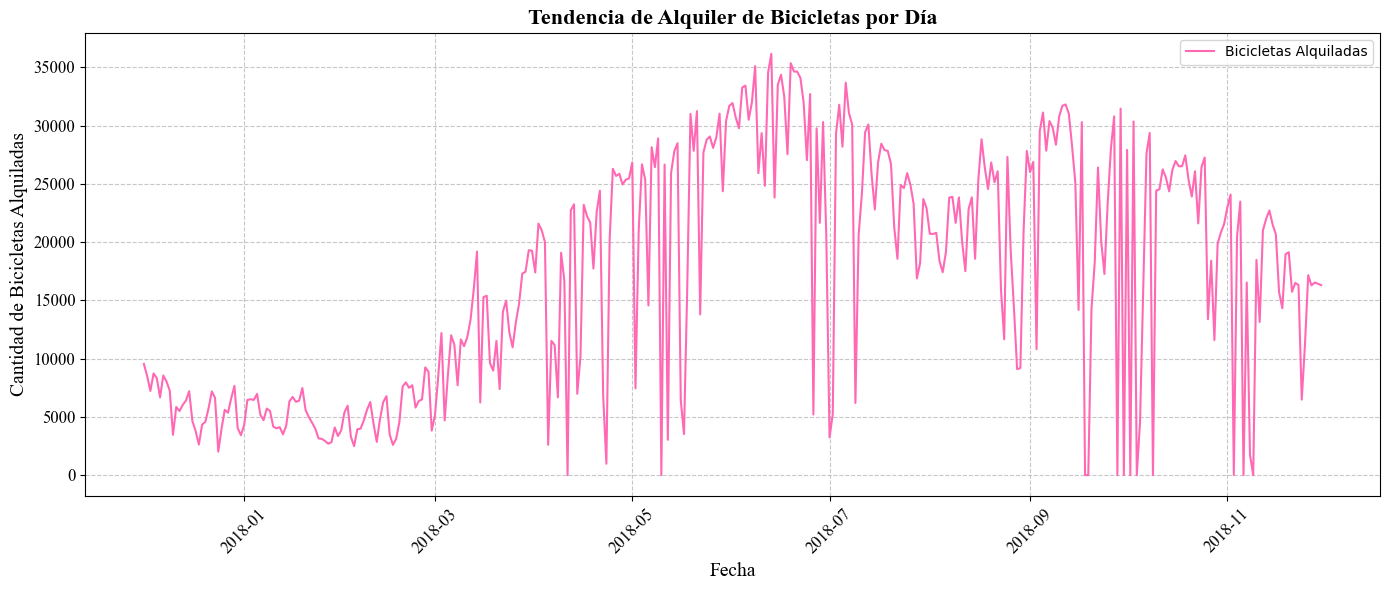

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

daily_rented = df.groupby('Date')['Rented Bike Count'].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_rented.index, daily_rented.values, label='Bicicletas Alquiladas', color='#FF69B4')  # Rosa pastel
plt.title('Tendencia de Alquiler de Bicicletas por Día', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Fecha', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()  
plt.show()


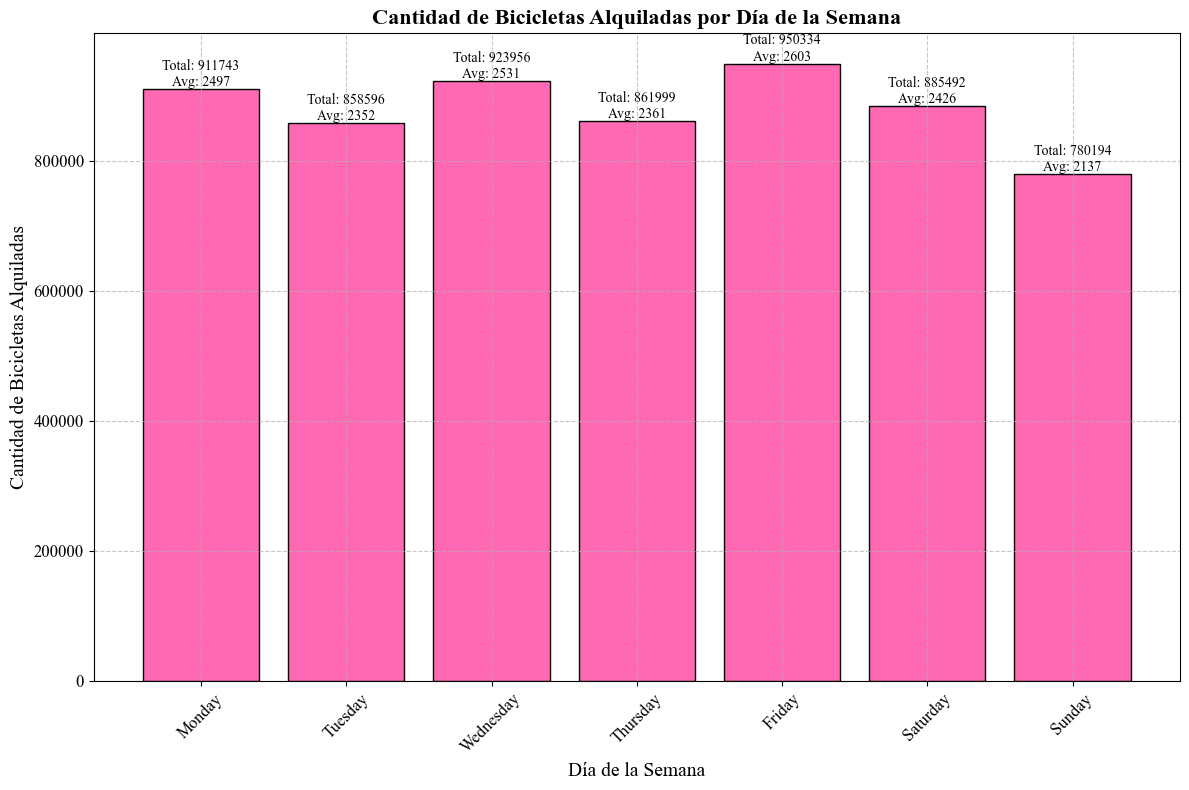

C:\Users\Carol\AppData\Local\Temp\ipykernel_6724\1329471777.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day of Week', y='Rented Bike Count', data=df, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB', '#FF69B4', '#FF1493', '#FFC0CB'])


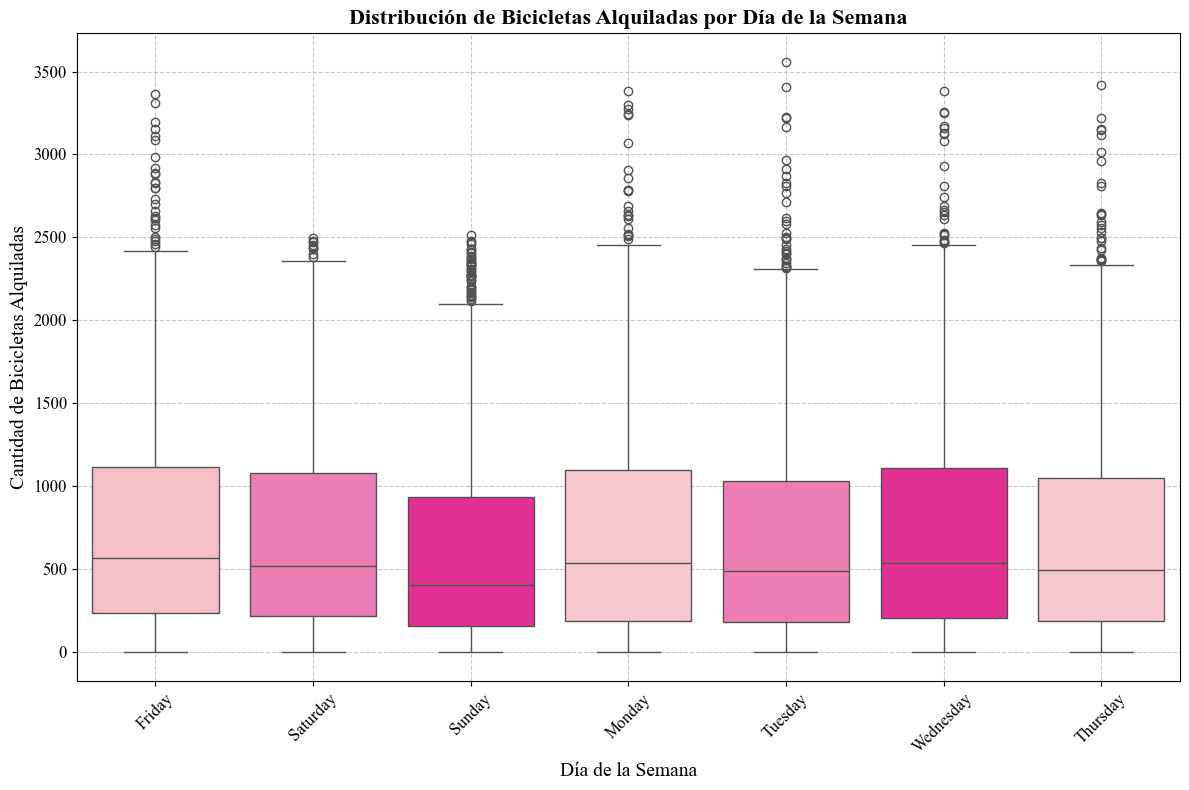

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day of Week'] = df['Date'].dt.day_name()

weekly_rented = df.groupby('Day of Week')['Rented Bike Count'].sum()

total_days = df['Date'].dt.date.nunique()
average_daily_rented = weekly_rented / total_days

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_rented = weekly_rented.reindex(ordered_days)
average_daily_rented = average_daily_rented.reindex(ordered_days)

plt.figure(figsize=(12, 8))
bars = plt.bar(weekly_rented.index, weekly_rented.values, color='#FF69B4', edgecolor='black')

for bar, total, avg in zip(bars, weekly_rented.values, average_daily_rented.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 10, f'Total: {int(total)}\nAvg: {int(avg)}', 
             ha='center', va='bottom', fontsize=10, family='Times New Roman')

plt.title('Cantidad de Bicicletas Alquiladas por Día de la Semana', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Día de la Semana', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()




df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day of Week'] = df['Date'].dt.day_name()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Day of Week', y='Rented Bike Count', data=df, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB', '#FF69B4', '#FF1493', '#FFC0CB'])

plt.title('Distribución de Bicicletas Alquiladas por Día de la Semana', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Día de la Semana', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_6724\2334135613.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rented = df.resample('M', on='Date')['Rented Bike Count'].mean()


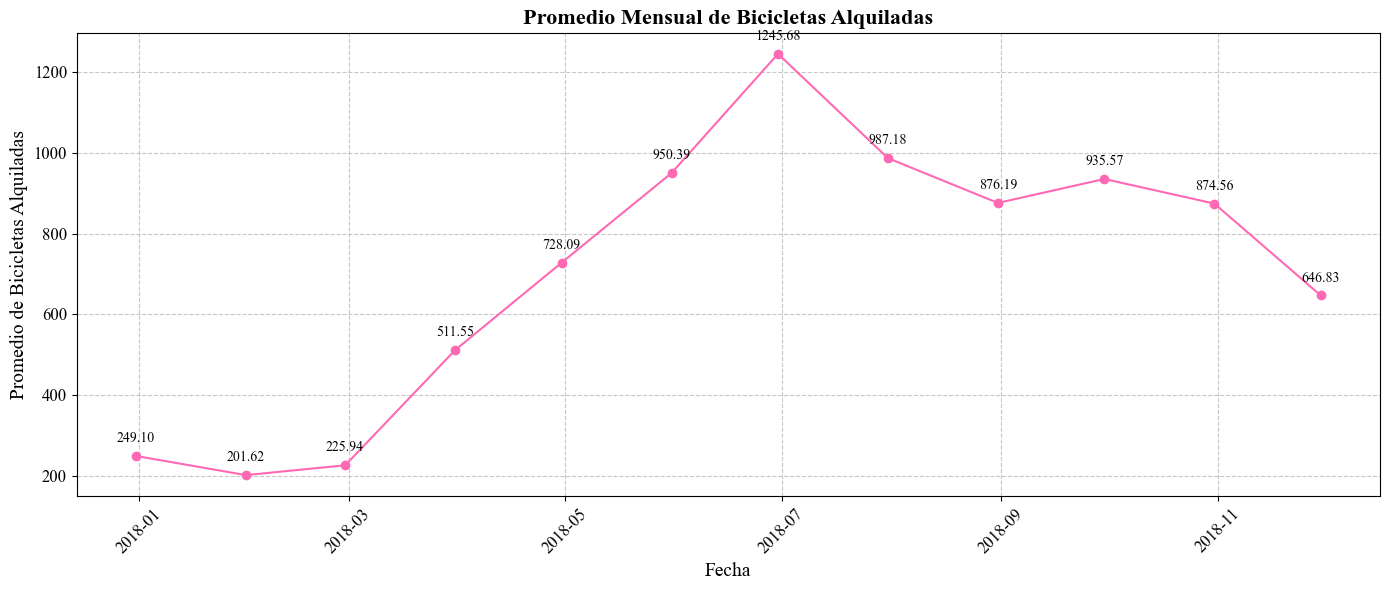

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
monthly_rented = df.resample('M', on='Date')['Rented Bike Count'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_rented.index, monthly_rented.values, marker='o', linestyle='-', color='#FF69B4')

for date, value in monthly_rented.items():
    plt.annotate(f'{value:.2f}', (date, value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, family='Times New Roman')

plt.title('Promedio Mensual de Bicicletas Alquiladas', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Fecha', fontsize=14, family='Times New Roman')
plt.ylabel('Promedio de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman', rotation=45)
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()


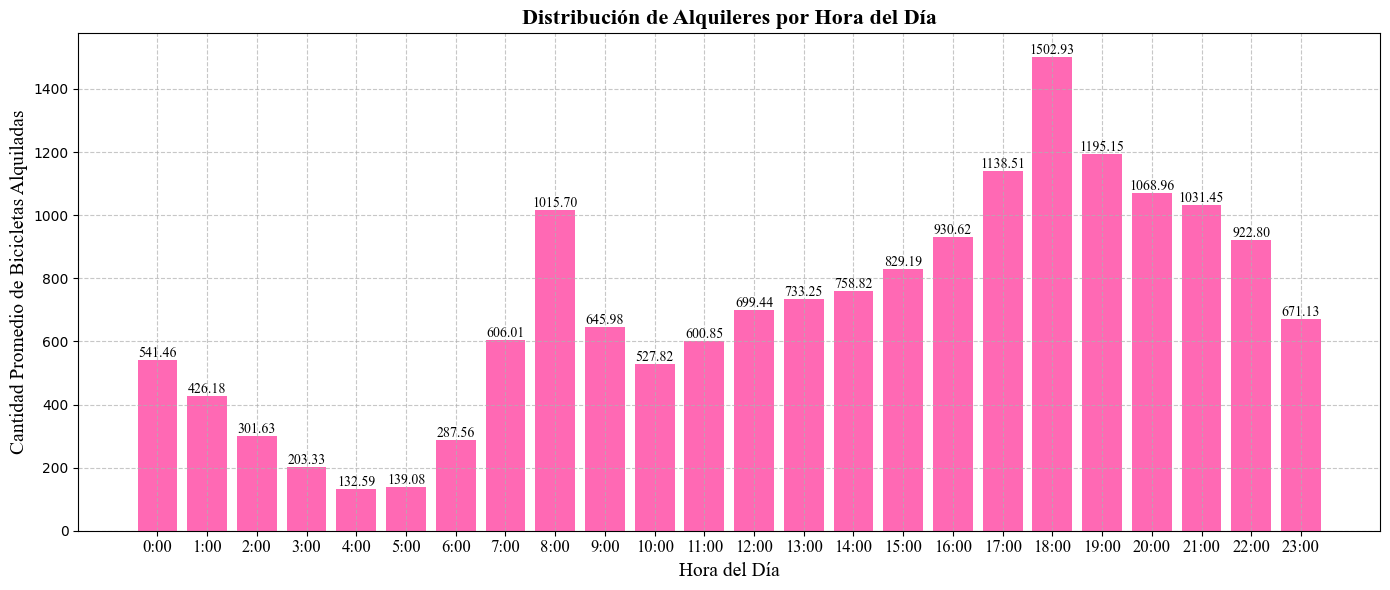

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
hourly_rented = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(14, 6))
bars = plt.bar(hourly_rented.index, hourly_rented.values, color='#FF69B4')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, family='Times New Roman')

plt.xticks(ticks=hourly_rented.index, labels=[f'{int(hour)}:00' for hour in hourly_rented.index], fontsize=12, family='Times New Roman')

plt.title('Distribución de Alquileres por Hora del Día', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Hora del Día', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad Promedio de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_6724\545898079.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=seasonal_rented.index, y=seasonal_rented.values, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB'])  # Tonalidades rosadas pastel


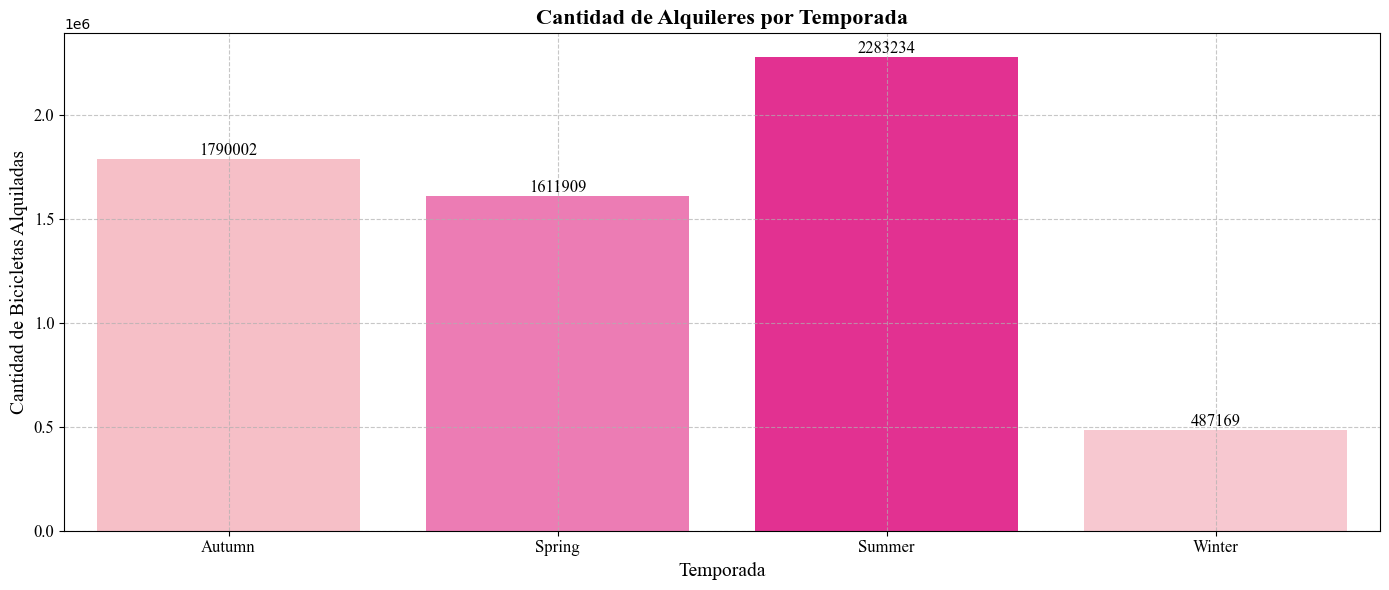

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

seasonal_rented = df.groupby('Seasons')['Rented Bike Count'].sum()

plt.figure(figsize=(14, 6))
bars = sns.barplot(x=seasonal_rented.index, y=seasonal_rented.values, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB'])  # Tonalidades rosadas pastel

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', 
             ha='center', va='bottom', fontsize=12, family='Times New Roman')

plt.title('Cantidad de Alquileres por Temporada', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Temporada', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()  
plt.show()


C:\Users\Carol\AppData\Local\Temp\ipykernel_6724\2236577011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_rented.index, y=holiday_rented.values, palette=['#FFB6C1', '#FF69B4'])


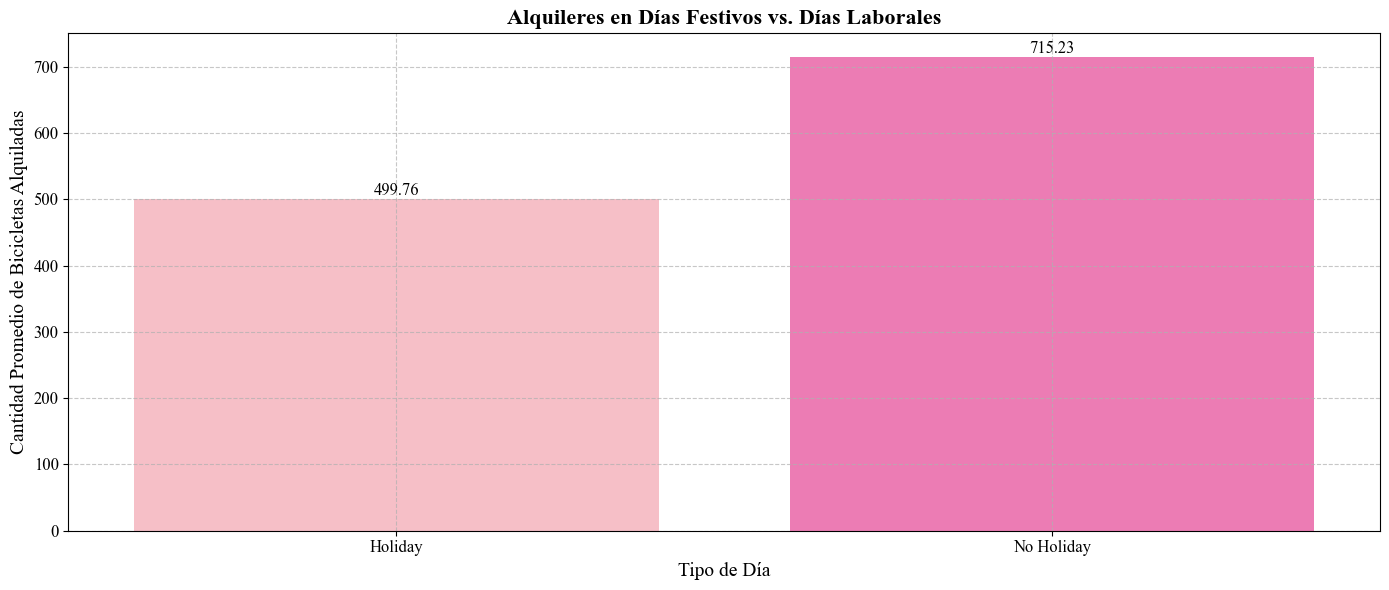

Promedio de bicicletas alquiladas en días festivos: 499.76
Promedio de bicicletas alquiladas en días laborables: 715.23
Porcentaje de aumento en días laborables respecto a días festivos: 43.12%


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

holiday_rented = df.groupby('Holiday')['Rented Bike Count'].mean()

plt.figure(figsize=(14, 6))
sns.barplot(x=holiday_rented.index, y=holiday_rented.values, palette=['#FFB6C1', '#FF69B4'])
plt.title('Alquileres en Días Festivos vs. Días Laborales', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Tipo de Día', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad Promedio de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)

for index, value in enumerate(holiday_rented.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, family='Times New Roman')

plt.xticks(fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()

mean_holiday = holiday_rented.get('Holiday', 0)
mean_no_holiday = holiday_rented.get('No Holiday', 0)

if mean_holiday > 0:
    percentage_increase = ((mean_no_holiday - mean_holiday) / mean_holiday) * 100
else:
    percentage_increase = float('inf')

print(f"Promedio de bicicletas alquiladas en días festivos: {mean_holiday:.2f}")
print(f"Promedio de bicicletas alquiladas en días laborables: {mean_no_holiday:.2f}")
print(f"Porcentaje de aumento en días laborables respecto a días festivos: {percentage_increase:.2f}%")


C:\Users\Carol\AppData\Local\Temp\ipykernel_6724\326144063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB'])


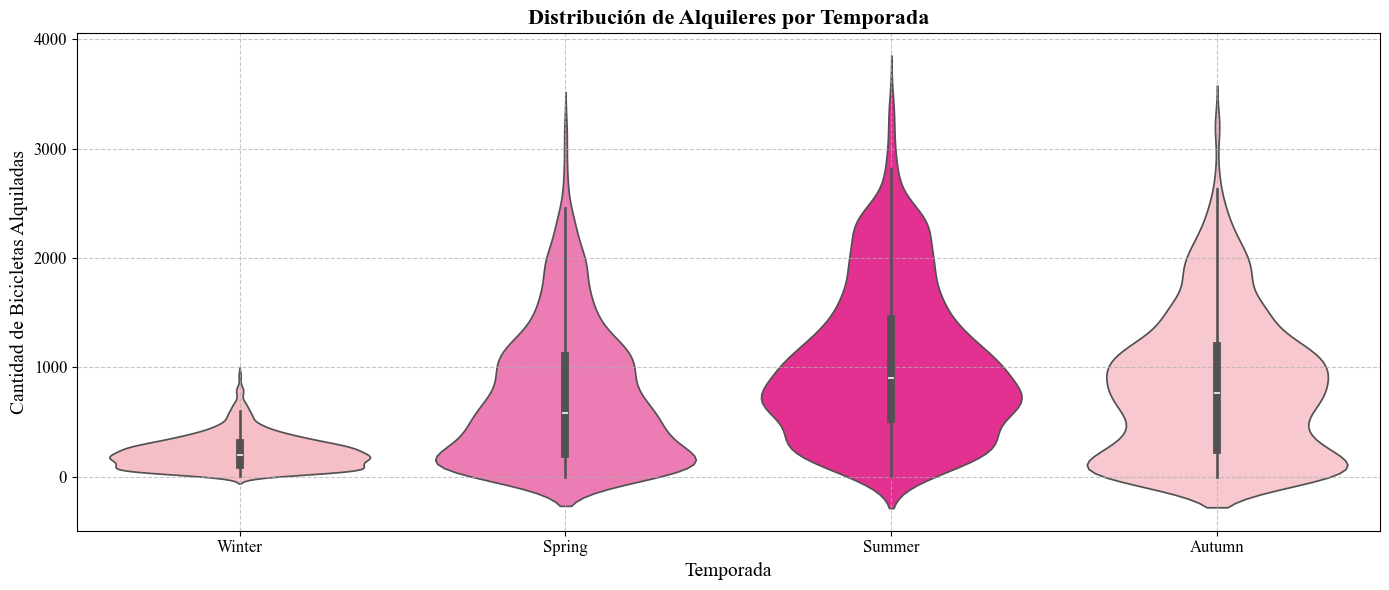

Estadísticas descriptivas de alquileres por temporada:
          count         mean         std  min     25%    50%      75%     max
Seasons                                                                      
Autumn   2184.0   819.597985  651.085621  0.0  241.75  763.5  1197.50  3298.0
Spring   2208.0   730.031250  621.509635  0.0  206.00  583.0  1105.25  3251.0
Summer   2208.0  1034.073370  690.244759  9.0  526.75  905.5  1442.50  3556.0
Winter   2160.0   225.541204  150.372236  3.0  110.00  203.0   305.00   937.0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 6))
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, palette=['#FFB6C1', '#FF69B4', '#FF1493', '#FFC0CB'])
plt.title('Distribución de Alquileres por Temporada', fontsize=16, fontweight='bold', family='Times New Roman')
plt.xlabel('Temporada', fontsize=14, family='Times New Roman')
plt.ylabel('Cantidad de Bicicletas Alquiladas', fontsize=14, family='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, family='Times New Roman')
plt.yticks(fontsize=12, family='Times New Roman')
plt.tight_layout()
plt.show()

seasonal_stats = df.groupby('Seasons')['Rented Bike Count'].describe(percentiles=[.25, .5, .75])
print("Estadísticas descriptivas de alquileres por temporada:")
print(seasonal_stats)


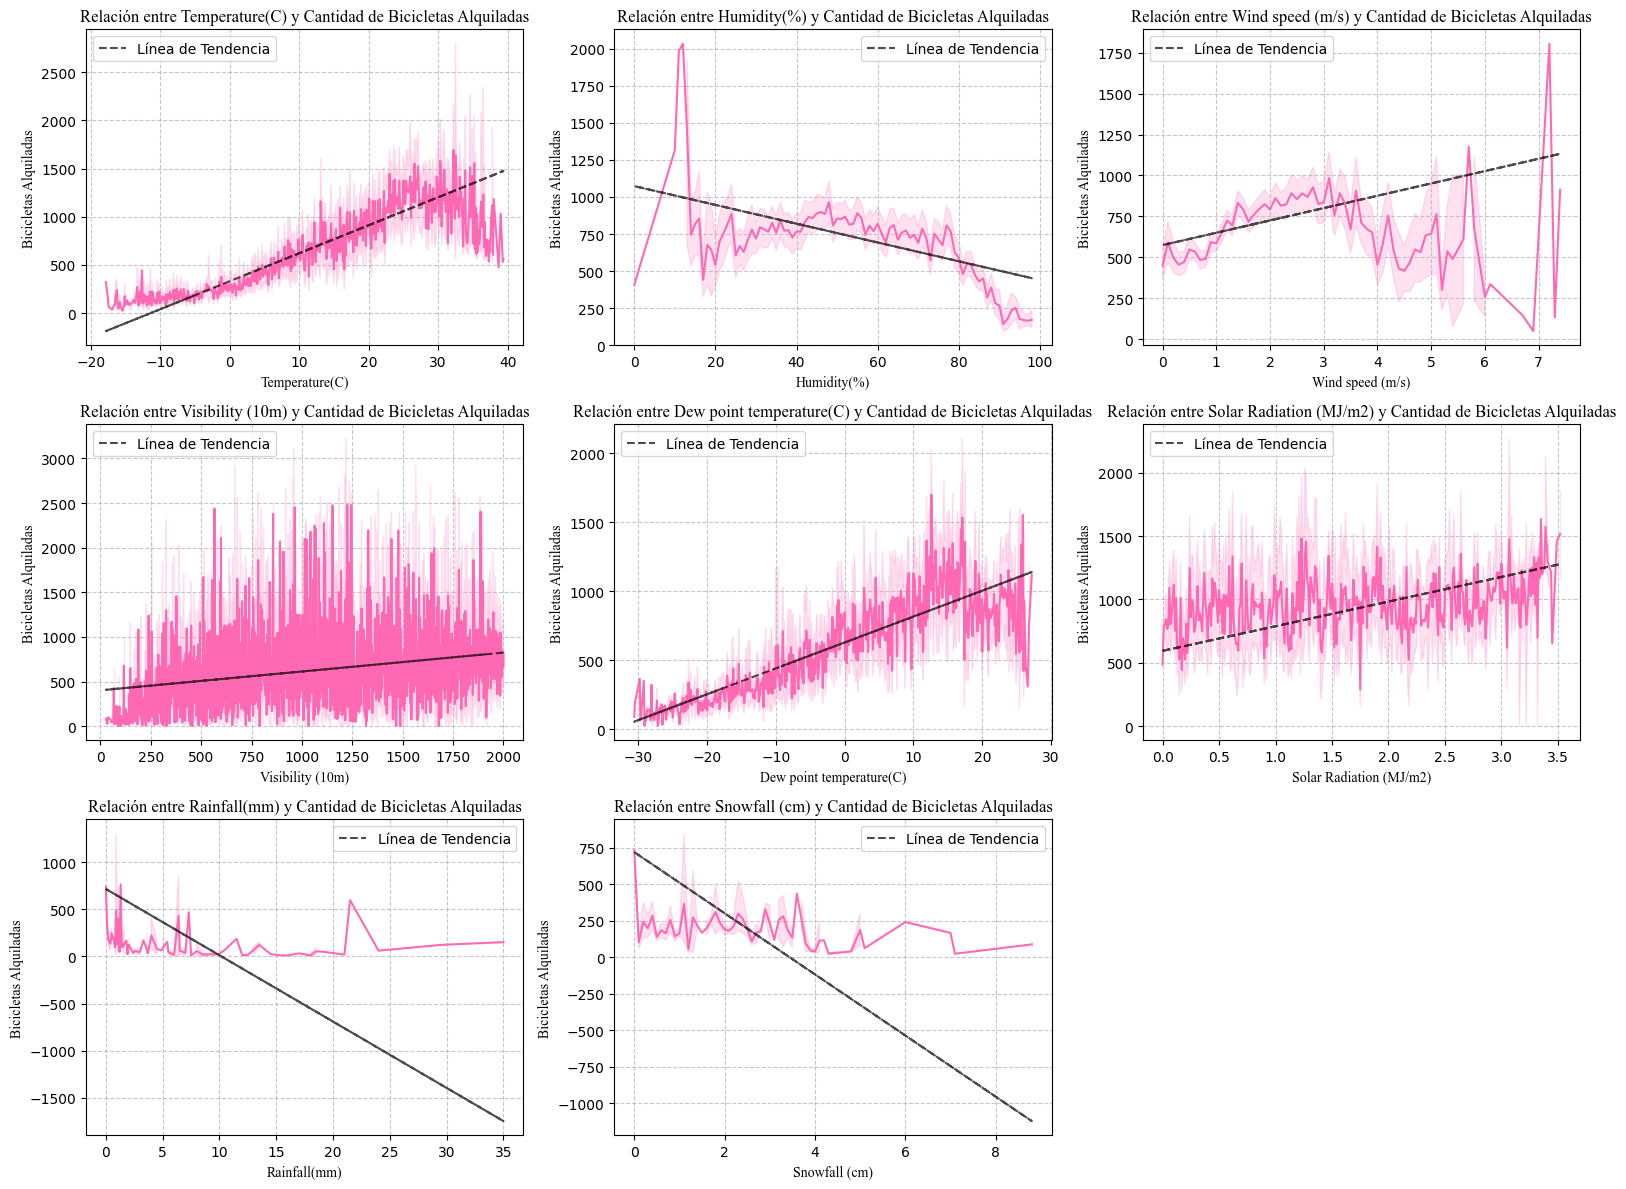

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

variables_climaticas = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
                        'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

plt.figure(figsize=(16, 12))

for i, var in enumerate(variables_climaticas):
    plt.subplot(3, 3, i + 1) 
    
    sns.lineplot(x=df[var], y=df['Rented Bike Count'], color='#FF69B4')
    
    x = df[var]
    y = df['Rented Bike Count']
    coef = np.polyfit(x, y, 1)  
    trendline = np.polyval(coef, x)  
    
 
    plt.plot(x, trendline, color='black', linestyle='--', alpha=0.7, label='Línea de Tendencia')
    
    plt.title(f'Relación entre {var} y Cantidad de Bicicletas Alquiladas', fontsize=12, family='Times New Roman')
    plt.xlabel(var, fontsize=10, family='Times New Roman')
    plt.ylabel('Bicicletas Alquiladas', fontsize=10, family='Times New Roman')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#